In [1]:
import math
import numpy
from matplotlib import pyplot as plt

%matplotlib inline

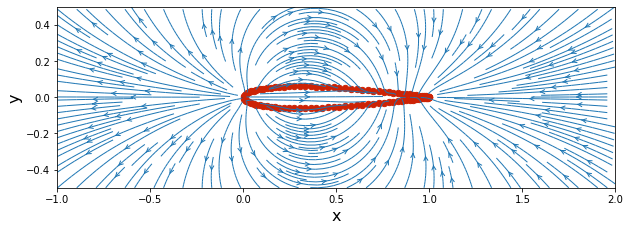

In [47]:
N = 51
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.5, 0.5
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

sigma = numpy.loadtxt('NACA0012_sigma.txt')
x_naca = numpy.loadtxt('NACA0012_x.txt')
y_naca = numpy.loadtxt('NACA0012_y.txt')

def get_velocity_naca(strength, xn, yn, X, Y):
    #u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    #v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    u = strength/(2*numpy.pi)*(X-xn)/((X-xn)**2+(Y-yn)**2)
    v = strength/(2*numpy.pi)*(Y-yn)/((X-xn)**2+(Y-yn)**2)
    
    return u, v


def get_stream_function_naca(strength, xn, yn, X, Y):
    #psi = - strength/(2*math.pi)*(Y-yd)/((Y-yd)**2+(X-xd)**2)
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-yn), (X-xn))
    
    return psi

u_naca, v_naca = 0, 0
psi_naca = 0
for i in range(len(x_naca)):
    u_i, v_i = get_velocity_naca(sigma[i], x_naca[i], y_naca[i], X, Y)
    u_naca += u_i
    v_naca += v_i
    psi_naca += get_stream_function_naca(sigma[i], x_naca[i], y_naca[i], X, Y)

size = 10
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_naca, v_naca,
               density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_naca, y_naca, color='#CD2305', s=40, marker='o')


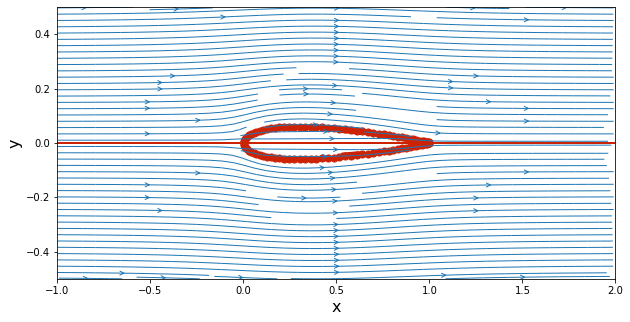

In [24]:
# равномерный поток
u_inf = 1.0  # скорость потока на бесконечности

u_freestream = u_inf * numpy.ones((N, N), dtype=float) 
v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

u = u_freestream + u_naca
v = v_freestream + v_naca
psi = psi_freestream + psi_naca

# линии тока
size = 10
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size*1.5))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
               density=1.5, linewidth=1, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psi, levels=[0.],
           colors='#CD2305', linewidths=2, linestyles='solid')
plt.scatter(x_naca, y_naca, color='#CD2305', s=50, marker='o')

# точка торможения
#x_stagn1, y_stagn1 = +math.sqrt(kappa/(2*math.pi*u_inf)), 0
#x_stagn2, y_stagn2 = -math.sqrt(kappa/(2*math.pi*u_inf)), 0

#plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
#            color='g', s=80, marker='o')

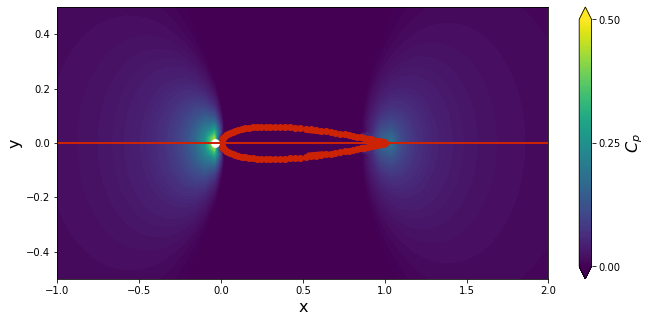

In [46]:
# коэффициент давления

cp = 1.0 - (u**2 + v**2)/u_inf**2

size = 10
plt.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size*1.5))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

contf = plt.contourf(X, Y, cp, levels=numpy.linspace(0.0, 0.5, 100),
                      extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([0.0, 0.25, 0.5])

plt.scatter(x_naca, y_naca,
            color='#CD2305', s=50, marker='o', linewidths=0)

plt.contour(X, Y, psi, levels=[0.],
           colors='#CD2305', linewidths=2, linestyles='solid')

plt.scatter(X[ind_max_Cp_2d], Y[ind_max_Cp_2d],
            color='w', s=60, marker='o')

In [38]:
# Максимальное значение Ср
ind_max_Cp = numpy.argmax(cp)
print("Index: ", ind_max_Cp)

# Индекс максимального Cp
ind_max_Cp_2d = numpy.unravel_index(ind_max_Cp, (len(cp), len(cp)))
print("Index 2D: ", ind_max_Cp_2d)

Cp_max = cp[ind_max_Cp_2d]
print("Cp max = ", Cp_max)

Index:  1291
Index 2D:  (25, 16)
Cp max =  0.4714436613316241
